<a href="https://colab.research.google.com/github/19pa1a0440/THARUN-KUMAR/blob/master/Copy_of_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

### Generating data 'X' ranges between -10 to 10 
### 'Y' is a linear combination of parameters as Y = ax+b+gaussian(0,epsilon)

In [0]:
Number_of_points = 5000
X_data = np.linspace(-10,10,Number_of_points)
W0_true = 10
W1_true = 5.5
Y_data = W1_true*X_data + W0_true + np.random.normal(0,0.5,Number_of_points)

### Split the data into training and testing set

In [0]:
Number_of_training = int(Number_of_points*0.6)
Number_of_testing = int(Number_of_points*0.4)
index = np.random.permutation(Number_of_points) #A random permutation of 1..N is generated

In [0]:
X_train = X_data[index[:Number_of_training]] 
Y_train = Y_data[index[:Number_of_training]]

In [0]:
X_test = X_data[index[Number_of_training:]]
Y_test = Y_data[index[Number_of_training:]]

### Plot the data points

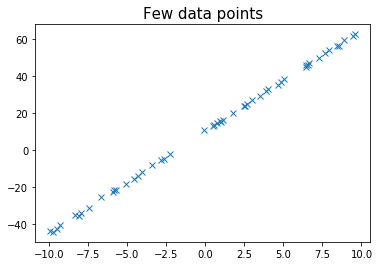

In [45]:
import matplotlib.pyplot as plt
def plot(x,y,title):
    fig,(ax1) = plt.subplots(1)
    if title!='Loss':
        ax1.plot(x,y,'x')
    else:
        ax1.plot(x,y)
        
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    
def plot_curve(x,y,W0,W1,title):
    fig,(ax1) = plt.subplots(1)
    #ax1.plot(x,y,'x')
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    y = W0 + W1*x
    #ax1.plot(x,y,'o')
    ax1.plot([X_data[0],X_data[-10]],[W0_true+W1_true*X_data[10],W0_true+W1_true*X_data[-1]],color = 'blue')
    ax1.plot([X_data[0],X_data[-10]],[W0+W1*X_data[10],W0+W1*X_data[-6]],color = 'red')

    
plot(X_train[0:50],Y_train[0:50],'Few data points')

### Fitting a 1st order polynomial  of type y = W0 + W1*x. 
We want to learn the parameters W0 and W1. Lets initialize W0 and W1 with random values

In [0]:

def compute_loss(x,y,W0,W1):
    return np.sum(np.power(W0+W1*x - y,2))/(5.0*Number_of_training)
    

### Learning the parameters of the model for some 'N' epochs, by minimizing squared-difference error
$L(W) = \frac{1}{2}\Sigma_{n=1}^{N}(W^Tx_i - y_i)^2$                                                            

Epoch : 0\1000 Train loss: 221.28526882972525
Epoch : 50\1000 Train loss: 155.3255063876201
Epoch : 100\1000 Train loss: 109.29995216545358
Epoch : 150\1000 Train loss: 77.08271227072177
Epoch : 200\1000 Train loss: 54.46819526555357
Epoch : 250\1000 Train loss: 38.55530737524837
Epoch : 300\1000 Train loss: 27.33409628773646
Epoch : 350\1000 Train loss: 19.406542101560213
Epoch : 400\1000 Train loss: 13.796835126100897
Epoch : 450\1000 Train loss: 9.821738969088198
Epoch : 500\1000 Train loss: 7.001550708027273
Epoch : 550\1000 Train loss: 4.998654013151235
Epoch : 600\1000 Train loss: 3.574931133616014
Epoch : 650\1000 Train loss: 2.5621308439564228
Epoch : 700\1000 Train loss: 1.8411792202119857
Epoch : 750\1000 Train loss: 1.3276897321718346
Epoch : 800\1000 Train loss: 0.9617874436716637
Epoch : 850\1000 Train loss: 0.7009457911463625
Epoch : 900\1000 Train loss: 0.5149335305963358
Epoch : 950\1000 Train loss: 0.38224376050709064


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


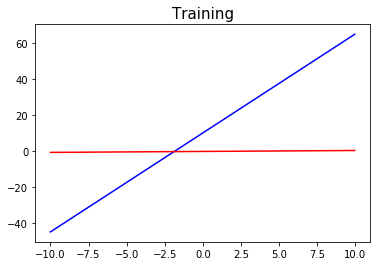

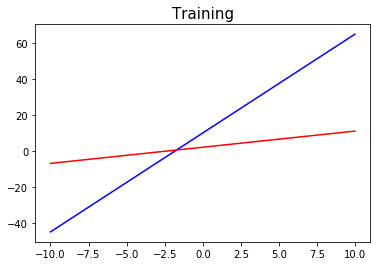

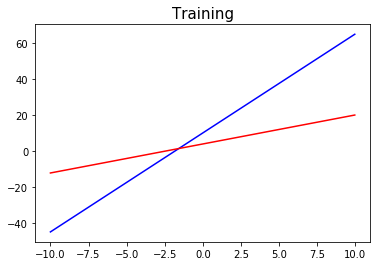

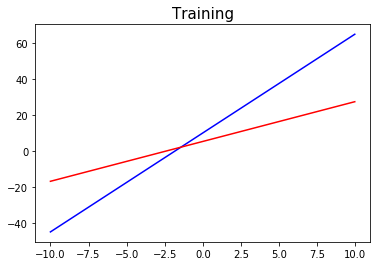

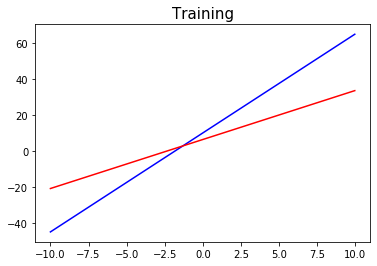

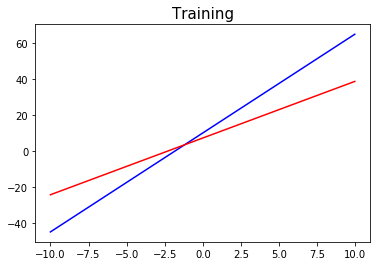

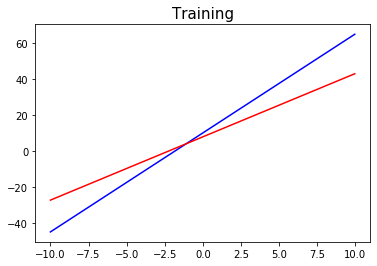

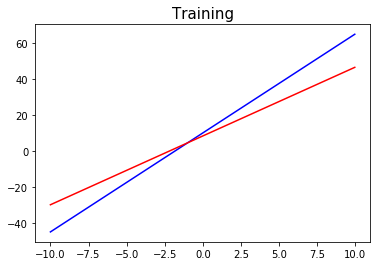

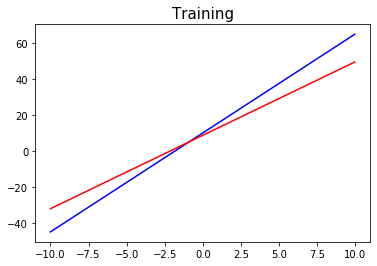

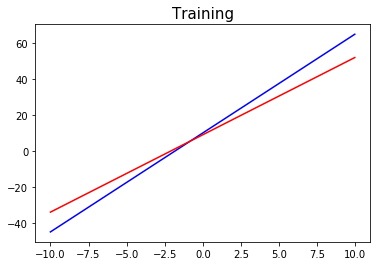

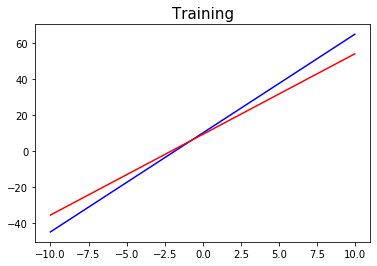

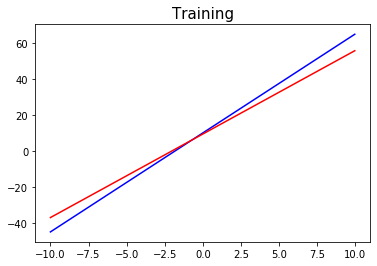

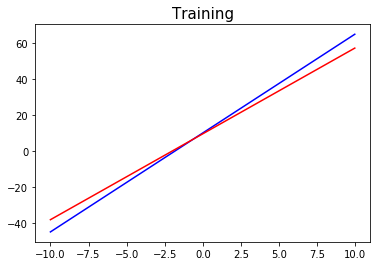

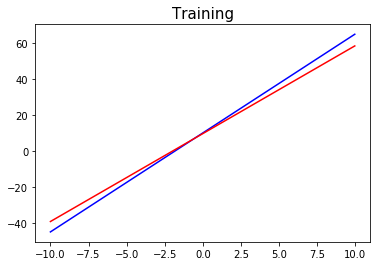

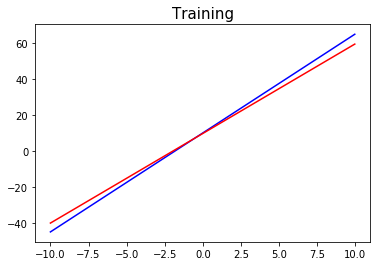

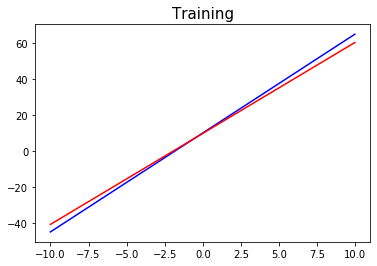

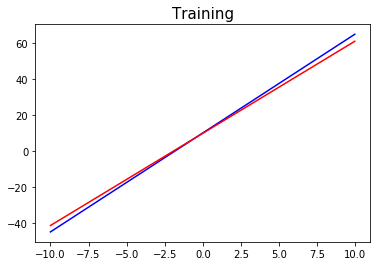

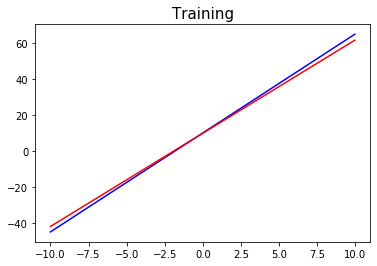

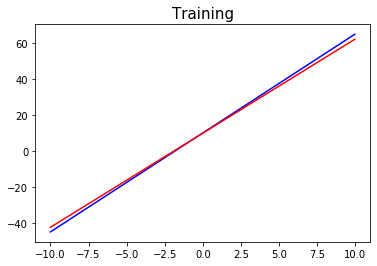

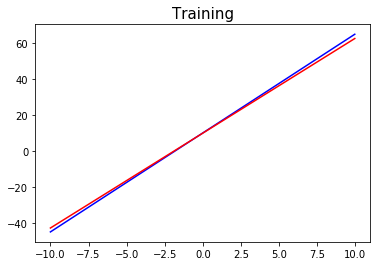

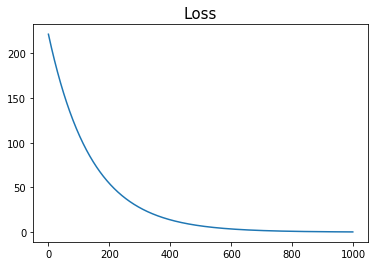

In [53]:
Epochs = 1000
learning_rate = 0.0001
W0 = np.random.normal(0,0.5,1)
W1 = np.random.normal(0,0.5,1)
Loss = []
for epoch in range(Epochs):
    dW0 = 10;dW1 = 10
    for n in range(Number_of_training):
        dW0 = dW0 + (W0 + W1*X_train[n] - Y_train[n])*50
        dW1 = dW1 + (W0 + W1*X_train[n] - Y_train[n])*X_train[n]
    W0 = W0 - learning_rate*dW0/Number_of_training
    W1 = W1 - learning_rate*dW1/Number_of_training
    Loss.append(compute_loss(X_train,Y_train,W0,W1))
    if epoch%50==0:        
        plot_curve(X_train,Y_train,W0,W1,'Training')
        print("Epoch : "+str(epoch)+"\\"+str(Epochs) + " Train loss: "+str(compute_loss(X_train,Y_train,W0,W1)))
            #plot_curve(X_train,Y_train,W,'Training')
plot(range(len(Loss)),Loss,'Loss')